### Practical 11

### Consider a portugies banking dataset, which is related to direct marketing campaigns (phone calls). The classification goal here is to predict whether the client will subscribe a term deposite (varible y) with the bank or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

from sklearn import tree

from sklearn.linear_model import LogisticRegression


###### Consider a portugies banking dataset, which is related to direct marketing campaigns (phone calls). 
The classification goal here is to predict wheter the client will subsribe a term deposite (variable y) with the bank or not.

In [13]:
dataset = pd.read_csv("D:/ML Dataset/Banking.csv")
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

<AxesSubplot:>

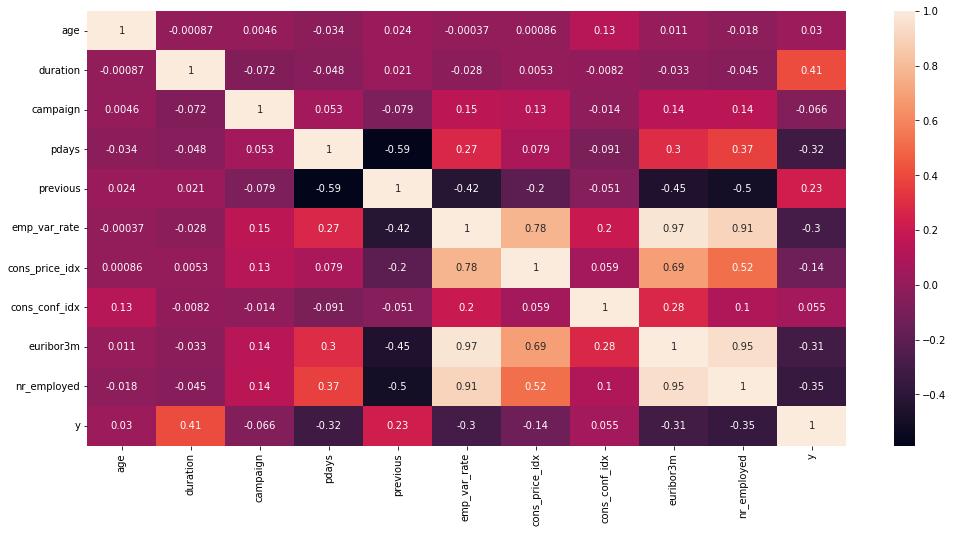

In [4]:
import seaborn as sn
fig = plt.figure(figsize=(17,8))
sns.heatmap(dataset.corr(),annot=True)

In [5]:
x = dataset.iloc[:,[0,10,13]].values
y = dataset.iloc[:,-1]

xtrain,xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state=0)

In [6]:
print(x)

[[ 44 210   0]
 [ 53 138   0]
 [ 28 339   2]
 ...
 [ 42  62   0]
 [ 48 200   0]
 [ 25 112   0]]


In [7]:
print(y)

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [10]:
classifier = LogisticRegression(random_state=0)
classifier.fit(xtrain,ytrain)

LogisticRegression(random_state=0)

In [11]:
y_pred = classifier.predict(xtest)
print(y_pred)

[0 0 0 ... 0 0 0]


In [12]:
import sklearn.metrics as metrics

print("Accuracy:", metrics.accuracy_score(ytest,y_pred)*100, "%")
print("Precision:", metrics.precision_score(ytest, y_pred)*100, "%")
print("Recall:", metrics.recall_score(ytest, y_pred)*100, "%")


Accuracy: 90.01650966300865 %
Precision: 62.92906178489702 %
Recall: 24.101665205959684 %
